In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

C:\Users\rodoh\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [75]:
enddate = date.datetime(2020,4,29)
startdate = date.datetime(2019,4,1)
tick = 'GFNORTEO.MX'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [45]:
pd.set_option('display.max_rows',None)

In [76]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,107.489998,105.620003,106.089996,106.199997,7402223.0,100.710121
2019-04-02,107.760002,105.510002,105.800003,107.500000,4993260.0,101.942924
2019-04-03,109.089996,106.809998,107.889999,108.949997,5163744.0,103.317963
2019-04-04,114.919998,108.129997,108.129997,112.760002,12879044.0,106.931015
2019-04-05,117.690002,113.370003,113.400002,116.150002,12403018.0,110.145775


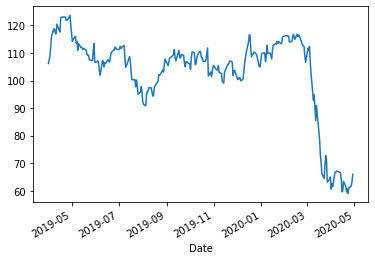

In [77]:
%matplotlib inline
data.Close.plot()

# Oscilador Estocastico

In [6]:
def STO(df, nK, nD, nS=1):
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min())/(df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SOk'+str(nK) )
    SOd = pd.Series(SOk.ewm(ignore_na = False, span = nD, min_periods = nD -1, adjust = True).mean(), name = 'SOd'+str(nD))
    SOk = SOk.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    SOd = SOd.ewm(ignore_na = False, span = nS, min_periods = nS - 1 , adjust = True).mean()
    df = df.join(SOk)
    df = df.join(SOd)
    df['Recomendacion'] = 0
    df.loc[(((SOk < SOd) & (SOk.shift(1) > SOd.shift(1))) & (SOd > 0.8)),'Recomendacion'] = 'Vender'
    df.loc[(((SOk > SOd) & (SOk.shift(1) < SOd.shift(1))) & (SOd < 0.2)),'Recomendacion'] = 'Comprar'
    df.loc[ df['Recomendacion'] == 0, 'Recomendacion'] = '-'

    return df

In [78]:
df2 = STO(data, 14, 3)

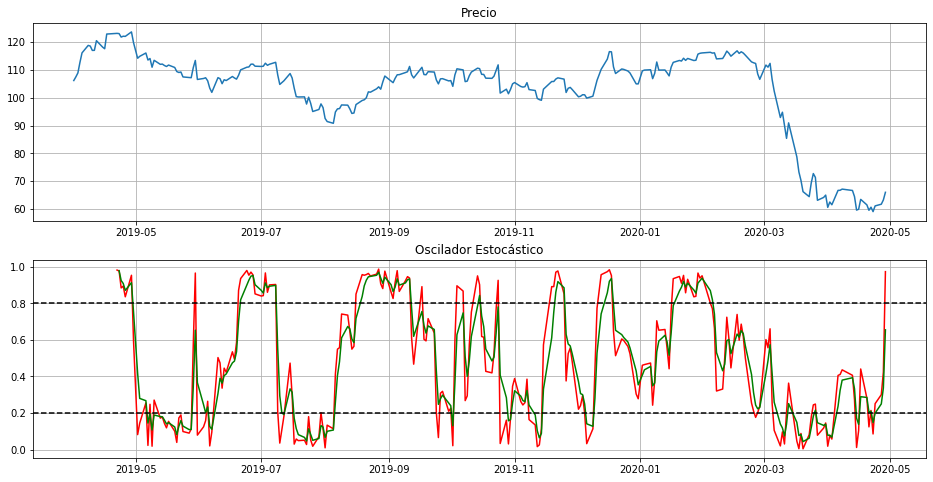

In [79]:
fig = plt.figure(figsize = (16,8))
ax1 = plt.subplot(211)
plt.plot(df2.Close)
plt.grid(True)
plt.title('Precio')
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(df2.SOk14, color = 'r')
plt.plot(df2.SOd3, color = 'g')
plt.axhline(y=0.8, color = 'k', linestyle = '--')
plt.axhline(y=0.2, color = 'k', linestyle = '--')
plt.title('Oscilador Estocástico')
plt.grid(True)
plt.show()

In [80]:
df2[['Close', 'Recomendacion']]

,Close,Recomendacion
Date,,
2019-04-01,106.199997,-
2019-04-02,107.500000,-
2019-04-03,108.949997,-
2019-04-04,112.760002,-
2019-04-05,116.150002,-
2019-04-08,118.830002,-
2019-04-09,118.599998,-
2019-04-10,117.040001,-
2019-04-11,117.059998,-
